In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import sklearn.metrics as metrics
import sklearn.linear_model
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std
%matplotlib inline
sns.set_style('dark')

## Models to try
1) Simple linear regression
2) Lasso
3) Ridge
4) complex model 6 features
5) model w all features
6) Polynomial

* make a datarframe containing the results of all the models
* results to look for: R^2, MSE
    Make it for both training and test sets
    
Year built, whether renovation has been done yet, lot to house ratio

#Write down the goal/question
For technical, show that the modeling is correct
For the non-technical, exlpain why the model is important and how does it help

In [2]:
raw_data = pd.read_csv("kc_house_data.csv")
display(raw_data.head())
print(raw_data.dtypes)
print(raw_data.shape)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object
(21613, 21)


In [3]:
display(raw_data.notnull().all())
raw_data.dtypes

id               True
date             True
price            True
bedrooms         True
bathrooms        True
sqft_living      True
sqft_lot         True
floors           True
waterfront       True
view             True
condition        True
grade            True
sqft_above       True
sqft_basement    True
yr_built         True
yr_renovated     True
zipcode          True
lat              True
long             True
sqft_living15    True
sqft_lot15       True
dtype: bool

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

## Data Exploration

In [4]:
raw_data.drop(['id', 'date'], axis=1, inplace=True)
raw_data.shape

(21613, 19)

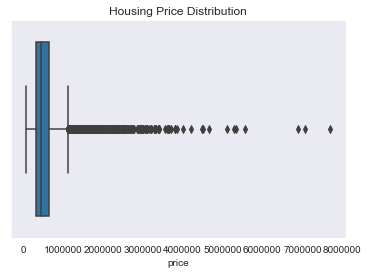

In [5]:
sns.boxplot(raw_data['price'])
plt.title("Housing Price Distribution")
plt.show()
drop = raw_data.loc[raw_data['price']>raw_data['price'].quantile(.95)]

In [6]:
raw_data.drop(drop.index, inplace=True)
raw_data.shape

(20532, 19)

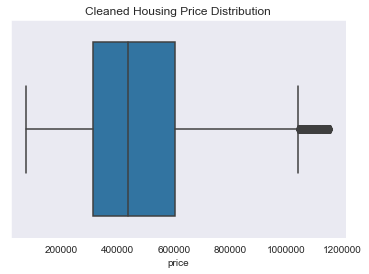

count    2.053200e+04
mean     4.790980e+05
std      2.113950e+05
min      7.500000e+04
25%      3.150000e+05
50%      4.388500e+05
75%      6.050000e+05
max      1.156000e+06
Name: price, dtype: float64

In [7]:
sns.boxplot(raw_data['price'])
plt.title("Cleaned Housing Price Distribution")
plt.show()
raw_data['price'].describe()

C:\Users\sohai\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


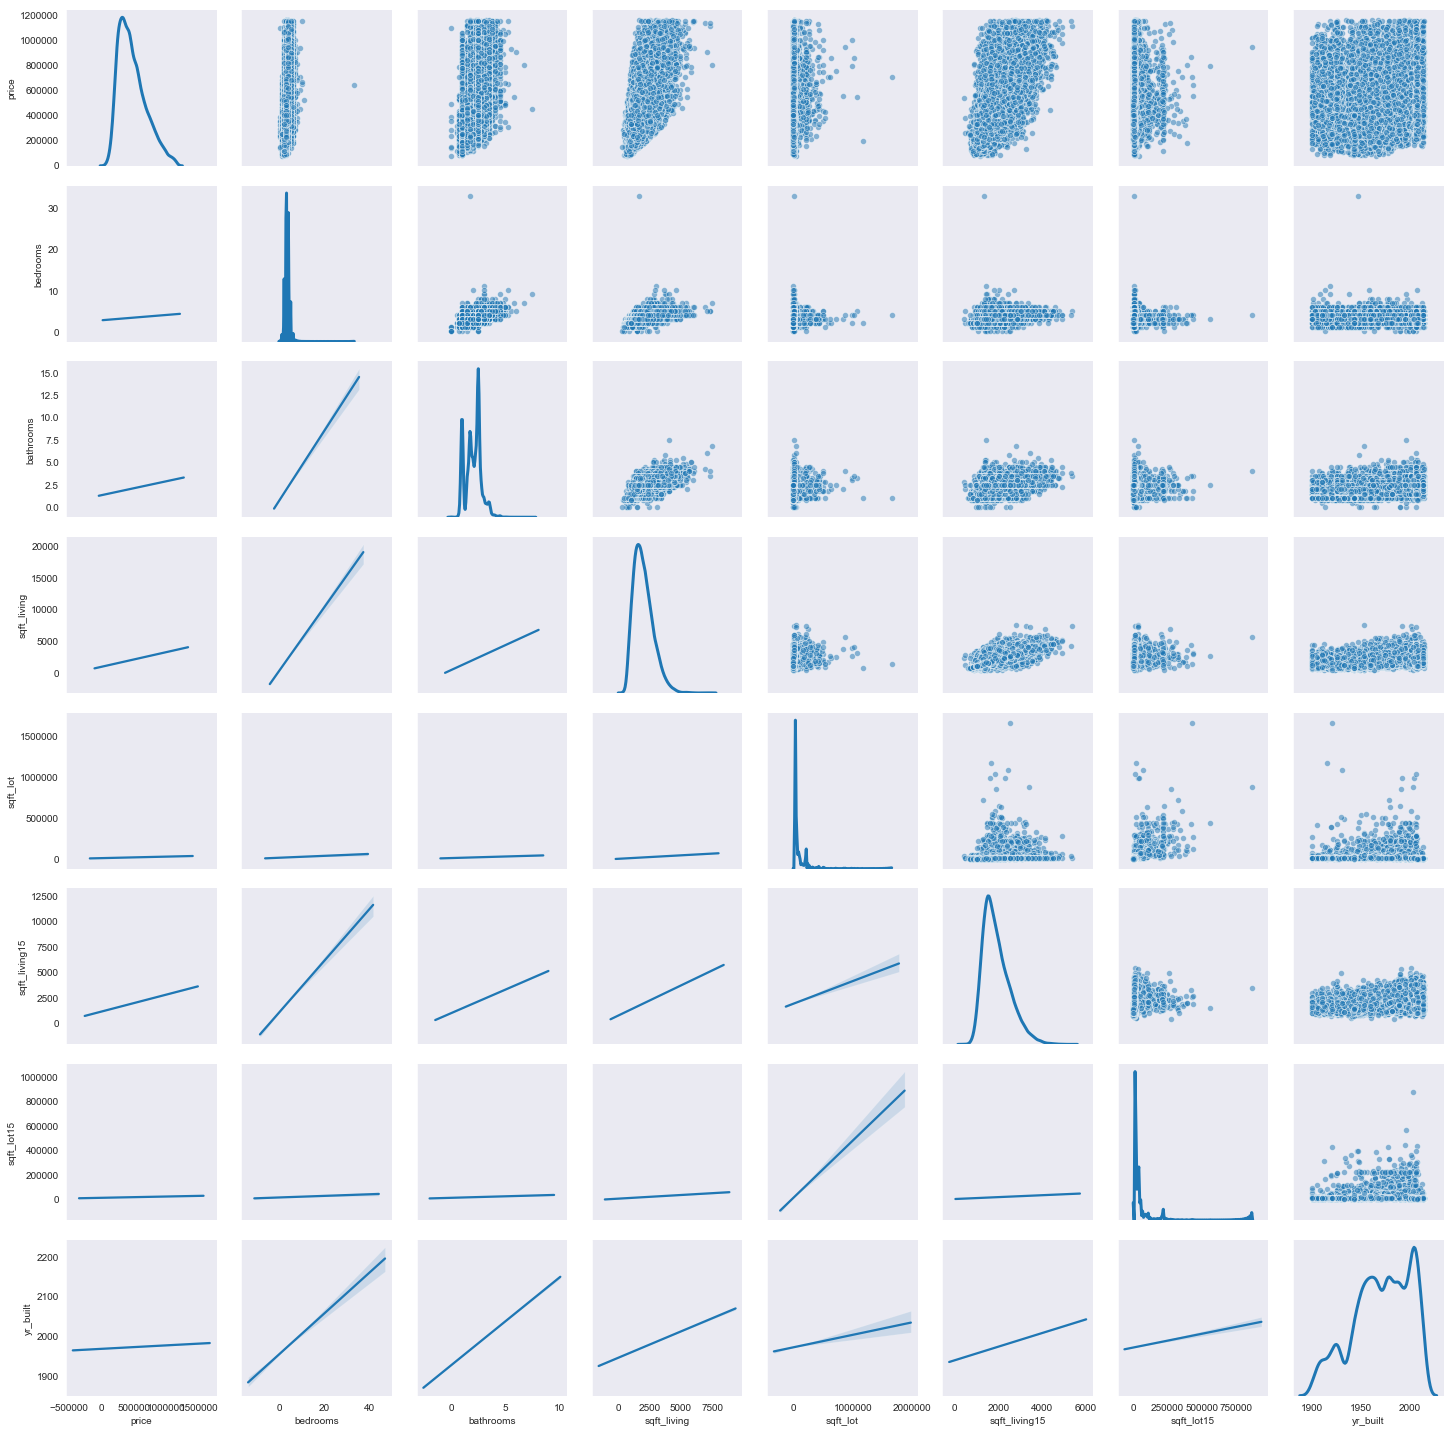

In [8]:
home_info = raw_data.loc[:, (['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_living15',
                              'sqft_lot15', 'yr_built'])]
sns.set_style(style='dark')
g = sns.PairGrid(home_info, diag_sharey=False)
g.map_upper(sns.scatterplot, alpha=.5)
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
g.map_diag(sns.kdeplot, lw=3)
plt.show()

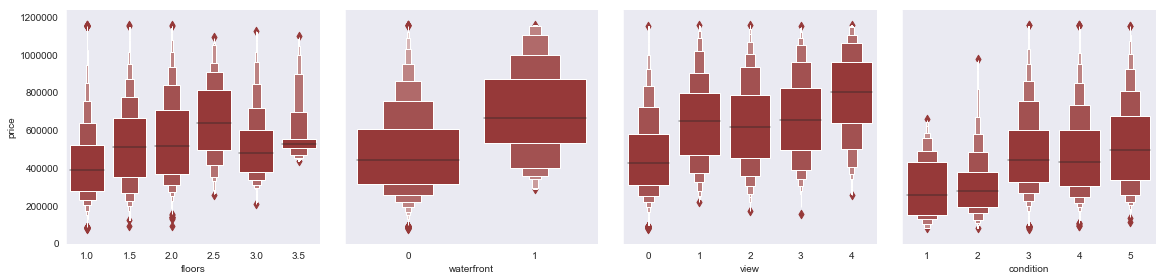

In [9]:
cat = raw_data.loc[:, ['price', 'floors', 'waterfront', 'view', 'condition']]
g = sns.PairGrid(cat, y_vars=['price'], x_vars=['floors', 'waterfront', 'view', 'condition'], height=4)
sns.boxplot()
g = g.map(sns.boxenplot, color='brown')

plt.show()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.299076,0.459821,0.627526,0.096770,0.273289,0.059553,0.243615,0.036566,0.635616,0.535522,0.239368,0.063737,0.083304,-0.021262,0.427336,0.073190,0.568382,0.083926
bedrooms,0.299076,1.000000,0.495219,0.584744,0.026231,0.154337,-0.030892,0.039907,0.025458,0.324452,0.464020,0.285545,0.160744,0.003741,-0.147784,-0.026665,0.138546,0.371940,0.022299
bathrooms,0.459821,0.495219,1.000000,0.718252,0.067795,0.500811,-0.003400,0.099191,-0.136581,0.616788,0.640090,0.225500,0.543223,0.025155,-0.206918,-0.006491,0.247897,0.531699,0.066541
sqft_living,0.627526,0.584744,0.718252,1.000000,0.163253,0.340947,0.003311,0.171929,-0.073741,0.709020,0.855185,0.378238,0.354217,0.020448,-0.204828,0.013941,0.286504,0.740339,0.174532
sqft_lot,0.096770,0.026231,0.067795,0.163253,1.000000,-0.015991,0.025241,0.077353,-0.003491,0.096024,0.166629,0.013497,0.043618,0.011347,-0.130003,-0.094333,0.222440,0.144552,0.710190
floors,0.273289,0.154337,0.500811,0.340947,-0.015991,1.000000,-0.001593,-0.012265,-0.277684,0.456277,0.528023,-0.293333,0.511115,-0.002375,-0.064750,0.037364,0.135882,0.269113,-0.020860
waterfront,0.059553,-0.030892,-0.003400,0.003311,0.025241,-0.001593,1.000000,0.300093,0.012862,-0.010698,-0.004574,0.014478,-0.040075,0.066060,0.043292,-0.044776,-0.058742,0.007351,0.032205
view,0.243615,0.039907,0.099191,0.171929,0.077353,-0.012265,0.300093,1.000000,0.034099,0.135467,0.070332,0.202012,-0.064605,0.065440,0.099448,-0.026920,-0.075283,0.190355,0.074974
condition,0.036566,0.025458,-0.136581,-0.073741,-0.003491,-0.277684,0.012862,0.034099,1.000000,-0.168180,-0.178666,0.178572,-0.354371,-0.059773,-0.004739,-0.017692,-0.101187,-0.118031,0.001326
grade,0.635616,0.324452,0.616788,0.709020,0.096024,0.456277,-0.010698,0.135467,-0.168180,1.000000,0.712715,0.078202,0.490923,-0.020329,-0.185437,0.087473,0.231107,0.674639,0.102914


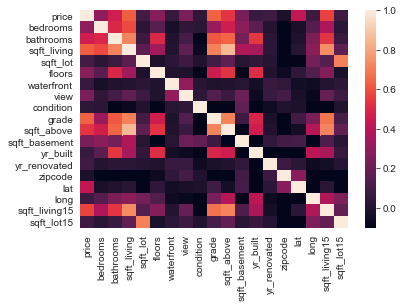

In [10]:
numerical = raw_data.loc[:,]
display(numerical.corr())
sns.heatmap(numerical.corr(), vmin=-.1, vmax=1)
# sqft_living has the highest correlation w price, so we can use that for the simple linear regression

# Data Preparation

In [11]:
#raw_data['zipcode'].nunique()
raw_data['zipcode'] = raw_data['zipcode'].astype('object')

In [12]:
raw_data.dtypes

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode           object
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

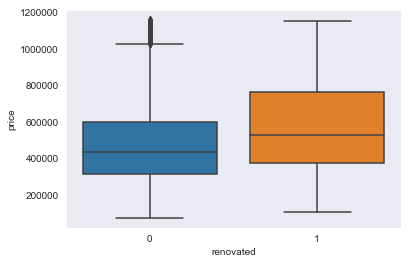

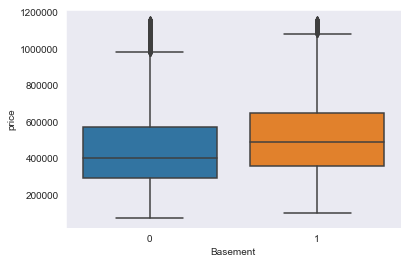

In [13]:
raw_data['renovated'] = np.where(raw_data['yr_renovated']>0, 1, 0)
sns.boxplot(x='renovated', y='price', data=raw_data)
plt.show()
raw_data['Basement'] = np.where(raw_data['sqft_basement']>0, 1, 0)
sns.boxplot(x='Basement', y='price', data=raw_data)
plt.show()

In [14]:
X = raw_data.drop('price', axis=1)
X = X.drop(['sqft_living15', 'sqft_lot15', 'yr_renovated', 'sqft_above', 'sqft_basement', 'yr_built', 'zipcode'], 1)
Y = raw_data['price']
#make dummies for the zipcode
dummies = pd.get_dummies(raw_data['zipcode'])
X_dummy = pd.concat([X, dummies], axis=1)
#Dropping some features that are no longer needed"
colnames = X_dummy.columns

Correlations of features against Price


price            1.000000
grade            0.635616
sqft_living      0.627526
sqft_living15    0.568382
sqft_above       0.535522
bathrooms        0.459821
lat              0.427336
bedrooms         0.299076
floors           0.273289
view             0.243615
sqft_basement    0.239368
Basement         0.165016
sqft_lot         0.096770
sqft_lot15       0.083926
yr_renovated     0.083304
renovated        0.082894
long             0.073190
yr_built         0.063737
waterfront       0.059553
condition        0.036566
Name: price, dtype: float64

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'renovated', 'Basement'],
      dtype='object')

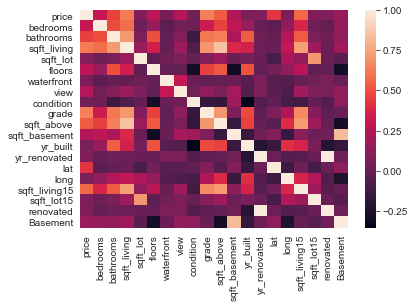

In [15]:
print("Correlations of features against Price")
display(raw_data.corr().iloc[:, 0].sort_values(ascending=False))
sns.heatmap(raw_data.corr())
raw_data.columns
#sqft a good candidate for a simple linear regression

In [16]:
#Creating funciton for the adjusted R^2
def AdjustedR(r2, n, k):
    return 1 - ((1-r2) * (n-1) / (n-k-1))

In [17]:
# First, we make a dataframe to hold the results of our evaluations
evaluation = pd.DataFrame(index=np.arange(0,6),
                          columns=['Model', 'Mean Absolute Error (MAE)', 'R^2 Train', 'Adjusted R^2 (Train)', 'R^2 Test', 'Adjusted R^2 (Test)'])

# PCA for colinear features

In [18]:
from sklearn.preprocessing import StandardScaler
df_pca = X.loc[:, ['sqft_living', 'grade', 'bedrooms', 'bathrooms', 'floors']]
scalar = StandardScaler()
scalar = scalar.fit_transform(df_pca)

In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
principal_comp = pca.fit_transform(scalar)

df_components = pd.DataFrame(principal_comp, index=X.index, columns=['Living Quality'])


In [20]:
X_ = pd.concat([df_components, X], 1)
X_dummy_pca = pd.concat([df_components, X_dummy], 1)

In [21]:
X_.drop(['sqft_living', 'grade', 'bedrooms', 'bathrooms', 'floors'], axis=1, inplace=True)
X_dummy_pca.drop(['sqft_living', 'grade', 'bedrooms', 'bathrooms', 'floors'], axis=1, inplace=True)

,Living Quality,sqft_lot,waterfront,view,condition,lat,long,renovated,Basement
Living Quality,1.000000,0.096346,-0.009892,0.122424,-0.157020,0.027715,0.276158,0.007746,0.070555
sqft_lot,0.096346,1.000000,0.025241,0.077353,-0.003491,-0.094333,0.222440,0.011449,-0.033660
waterfront,-0.009892,0.025241,1.000000,0.300093,0.012862,-0.044776,-0.058742,0.066454,0.013046
view,0.122424,0.077353,0.300093,1.000000,0.034099,-0.026920,-0.075283,0.065571,0.144887
condition,-0.157020,-0.003491,0.012862,0.034099,1.000000,-0.017692,-0.101187,-0.059316,0.131749
lat,0.027715,-0.094333,-0.044776,-0.026920,-0.017692,1.000000,-0.132272,0.021052,0.131983
long,0.276158,0.222440,-0.058742,-0.075283,-0.101187,-0.132272,1.000000,-0.062974,-0.234819
renovated,0.007746,0.011449,0.066454,0.065571,-0.059316,0.021052,-0.062974,1.000000,0.029811
Basement,0.070555,-0.033660,0.013046,0.144887,0.131749,0.131983,-0.234819,0.029811,1.000000


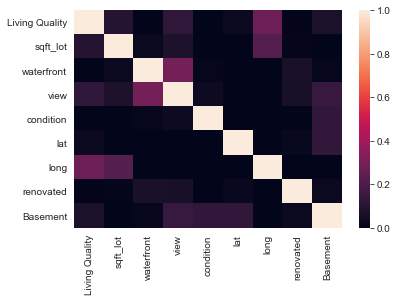

In [22]:
sns.heatmap(X_.corr(), vmin=0)
display(X_.corr())

# Simple Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression
simple_X = raw_data.loc[:, 'sqft_living']
X_train, X_test, Y_train, Y_test = train_test_split(simple_X, Y, test_size=.2, random_state=10)
lr = LinearRegression()
#Using the sqft_living as the feature as it correlates the most with price
train_simple = X_train.values.reshape(-1,1)
test_simple = X_test.values.reshape(-1,1)
lr.fit(train_simple, Y_train)

print("\n20% holdout test score: \n", lr.score(test_simple, Y_test))
print('\nIntercept:')
print(lr.intercept_)
print('\nCoefficients:')
print(lr.coef_)
mse = format(metrics.mean_absolute_error(Y_test, lr.predict(test_simple)), '.3f')
pearson_train = lr.score(train_simple, Y_train)
pearson_test = lr.score(test_simple, Y_test)


20% holdout test score: 
 0.41542886229160375

Intercept:
144537.78316066304

Coefficients:
[169.06997121]


In [24]:
evaluation.iloc[0] = ['Simple Linear Model', mse, pearson_train, '-', pearson_test, '-']
evaluation

,Model,Mean Absolute Error (MAE),R^2 Train,Adjusted R^2 (Train),R^2 Test,Adjusted R^2 (Test)
0,Simple Linear Model,130346.683,0.388233,-,0.415429,-
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN


## Use all features

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X_dummy, Y, test_size=.2, random_state=10)
full_lr = LinearRegression()
full_lr.fit(X_train, Y_train)

print("20% sample test score: ", full_lr.score(X_test, Y_test))
print("\nIntercept: ", full_lr.intercept_)
print("\nCoefficients: ", full_lr.coef_)
mae = format(metrics.mean_absolute_error(Y_test, full_lr.predict(X_test)), '.3f')
print("\nMean Absolute Error: ", mae)
#multicollinearity can explain why some of these coefficients are negative

20% sample test score:  0.824736154118626

Intercept:  -14882891.668519195

Coefficients:  [-3.93088343e+03  3.09588345e+03  1.21050878e+02  3.41654487e-01
 -1.63721113e+04  1.86245495e+05  3.40917653e+04  2.62309678e+04
  4.79960958e+04  1.60086434e+05 -5.80841126e+04  4.57042120e+04
 -2.72051546e+04 -1.52223230e+05 -1.40944511e+05 -1.57102560e+05
  3.36242362e+05  1.49292415e+05  9.61748834e+04  7.00212946e+04
  5.18483144e+04 -5.21638005e+04 -6.56436098e+04 -7.18368541e+04
 -9.73694834e+04 -1.23609950e+05 -1.72477248e+05 -1.82367660e+04
  2.44501750e+04 -8.38913523e+04  5.55341077e+04 -1.49211956e+05
 -1.52529783e+05 -1.69734036e+05  1.20275463e+05 -2.29762460e+04
 -1.05169794e+05  4.37739115e+05  2.41324497e+05 -1.40787815e+05
 -4.47504759e+04  6.59301214e+04  4.61669565e+04 -1.27003130e+05
 -7.63957562e+04 -1.26137485e+05 -6.16451032e+04 -2.20675526e+04
 -9.33883515e+04 -3.07834521e+04  3.53118954e+04  7.17369202e+04
 -2.22763373e+04 -1.59250759e+05  2.20599534e+05  1.07562172e+05

In [26]:
cross_val_score(full_lr, X_dummy, Y, cv=10)

array([0.83224919, 0.81672342, 0.82630769, 0.81055944, 0.82250605,
       0.8245825 , 0.83247772, 0.8379552 , 0.81334055, 0.79689822])

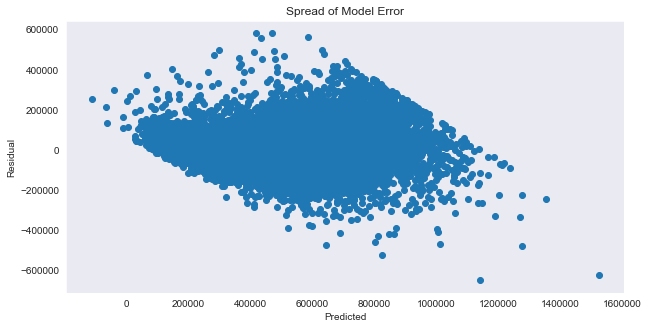

In [27]:
predicted = full_lr.predict(X_dummy)
residual = Y - predicted
plt.figure(figsize=(10,5))
plt.scatter(predicted, residual)
plt.xlabel("Predicted")
plt.ylabel("Residual")
plt.title("Spread of Model Error")
plt.show()
#Error distribution is not even, so a better model is needed

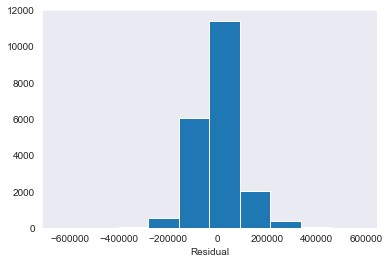

In [28]:
plt.hist(residual)
plt.xlabel("Residual")
plt.show()

In [29]:
pearson_train = full_lr.score(X_train, Y_train)
pearson_test = full_lr.score(X_test, Y_test)
adj_train = AdjustedR(pearson_train, X_train.shape[0], X_train.shape[1])
adj_test = AdjustedR(pearson_train, X_test.shape[0], X_test.shape[1])

evaluation.iloc[1] = ['Complex Model (basic feats)', mae, pearson_train, adj_train, pearson_test, adj_test]
evaluation

,Model,Mean Absolute Error (MAE),R^2 Train,Adjusted R^2 (Train),R^2 Test,Adjusted R^2 (Test)
0,Simple Linear Model,130346.683,0.388233,-,0.415429,-
1,Complex Model (basic feats),64613.100,0.825605,0.824719,0.824736,0.822007
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
linear_formula = 'price ~ bedrooms+bathrooms+sqft_living+sqft_lot+floors+waterfront+view+condition+grade+lat+long+renovated+Basement'

# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=raw_data).fit()

In [31]:
print("Parameters: \n", lm.params)
print("\np-values for parameters: ", lm.pvalues)

Parameters: 
 Intercept     -3.527506e+07
bedrooms      -6.664253e+03
bathrooms     -6.720081e+03
sqft_living    1.047605e+02
sqft_lot       2.021358e-01
floors         1.213765e+04
waterfront     1.272017e+05
view           3.830081e+04
condition      4.282955e+04
grade          7.049348e+04
lat            5.875731e+05
long          -5.669659e+04
renovated      7.719147e+04
Basement       5.895395e+03
dtype: float64

p-values for parameters:  Intercept       0.000000e+00
bedrooms        2.648236e-08
bathrooms       6.452819e-04
sqft_living     0.000000e+00
sqft_lot        9.512049e-20
floors          1.166154e-08
waterfront      1.923163e-15
view           4.369867e-154
condition      2.836649e-204
grade           0.000000e+00
lat             0.000000e+00
long            1.128225e-16
renovated       1.724234e-64
Basement        5.092986e-03
dtype: float64


## Lasso Regression

In [32]:
from sklearn.linear_model import Lasso
#Lets try to do lasso without the pca to see if we can get some interpretability
X_train, X_test, Y_train, Y_test = train_test_split(X_dummy, Y, test_size=.2, random_state=10)
lasso = Lasso(alpha=10, random_state=10, max_iter=5000, tol=.0001)
lasso.fit(X_train, Y_train)

print("\n20% sample score: ", lasso.score(X_test, Y_test))
print("\nIntercept: ", lasso.intercept_)
print("\nCoefficients: ", lasso.coef_)

mae = format(metrics.mean_absolute_error(Y_test, lasso.predict(X_test)), '.3f')
print("\nMean Absolute Error: ", mae)
#convert into scientific notation for better interpretability


20% sample score:  0.8247304449627647

Intercept:  -18056363.955562964

Coefficients:  [-3.92665422e+03  2.84917076e+03  1.20918375e+02  3.38771378e-01
 -1.57711373e+04  1.82248134e+05  3.41991705e+04  2.64399477e+04
  4.81496966e+04  2.61736152e+05 -4.41992445e+04  4.56736715e+04
 -2.66781306e+04 -9.14386333e+04 -8.04862770e+04 -9.61564468e+04
  3.63362760e+05  1.76062885e+05  1.28511488e+05  9.62056742e+04
  7.80449996e+04  0.00000000e+00 -5.07404315e+04 -5.28372617e+04
 -8.39053810e+04 -5.62381007e+04 -1.10546915e+05  9.21408896e+03
  5.92803197e+04 -6.87100783e+04  8.57397328e+04 -9.53800602e+04
 -1.02371866e+05 -1.14476213e+05  1.40820746e+05 -5.19645842e+03
 -5.41624338e+04  4.31464430e+05  2.73812793e+05 -8.81944582e+04
 -7.26325939e+03  8.57619324e+04  6.46216811e+04 -8.22315161e+04
 -3.74022764e+04 -8.11326213e+04 -2.13978412e+04  9.14289290e+03
 -3.82739162e+04 -1.67316875e+04  5.97109305e+04  9.94497438e+04
 -8.34384070e+03 -9.93174157e+04  2.45594669e+05  1.30634756e+05
  

In [33]:
#Cross validation
cross_val_score(lasso, X_dummy, Y, cv=10)

array([0.83202595, 0.81677193, 0.8264046 , 0.81050728, 0.82240005,
       0.82452781, 0.83224696, 0.83807761, 0.81336173, 0.79652041])

In [34]:
pearson_train = lasso.score(X_train, Y_train)
pearson_test = lasso.score(X_test, Y_test)
adj_train = AdjustedR(pearson_train, X_train.shape[0], X_train.shape[1])
adj_test = AdjustedR(pearson_train, X_test.shape[0], X_test.shape[1])
evaluation.iloc[2] = ['Lasso', mae, pearson_train, adj_train, pearson_test, adj_test]
evaluation

,Model,Mean Absolute Error (MAE),R^2 Train,Adjusted R^2 (Train),R^2 Test,Adjusted R^2 (Test)
0,Simple Linear Model,130346.683,0.388233,-,0.415429,-
1,Complex Model (basic feats),64613.100,0.825605,0.824719,0.824736,0.822007
2,Lasso,64616.036,0.825509,0.824623,0.82473,0.821909
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN


# Gradient Boosting Regressor for feature selection

In [35]:
from sklearn import ensemble
param = {"max_depth": 4,
          "max_features": 'sqrt',
          "random_state": 10}
boost = ensemble.GradientBoostingRegressor(**param)
X_train, X_test, Y_train, Y_test = train_test_split(X_dummy, Y, test_size=.2, random_state=10)

boost.fit(X_train, Y_train)

print("\n20% sample score: ", boost.score(X_test, Y_test))
mae = format(metrics.mean_absolute_error(Y_test, boost.predict(X_test)), '.3f')
print("\nMean Absolute Error: ", mae)

C:\Users\sohai\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d



20% sample score:  0.8340452691607582

Mean Absolute Error:  62261.743


In [36]:
clean = []
remove = []
feat_labels = X.columns
for feature in zip(feat_labels, boost.feature_importances_):
    if (feature[1]<0):
        print(feature)
        remove.append(feature[0])
    elif (feature[1]>.05):
        print(feature)
        clean.append(feature[0])
X = X.drop(remove, axis=1)
X_ = X_.drop(remove, axis=1)
print(clean)
features = ['sqft_living', 'grade', 'bedrooms', 'bathrooms', 'waterfront', 'renovated', 'Basement']

('sqft_living', 0.1099746168204798)
('sqft_lot', 0.060083545263249834)
('grade', 0.1179798820650631)
('lat', 0.20886493694039548)
['sqft_living', 'sqft_lot', 'grade', 'lat']


In [37]:
pearson_train = boost.score(X_train, Y_train)
pearson_test = boost.score(X_test, Y_test)

adj_train = AdjustedR(pearson_train, X_train.shape[0], X_train.shape[1])
adj_test = AdjustedR(pearson_train, X_test.shape[0], X_test.shape[1])

evaluation.iloc[3] = ['Gradient Boosted Regressor', mae, pearson_train, '-', pearson_test, '-']
evaluation

,Model,Mean Absolute Error (MAE),R^2 Train,Adjusted R^2 (Train),R^2 Test,Adjusted R^2 (Test)
0,Simple Linear Model,130346.683,0.388233,-,0.415429,-
1,Complex Model (basic feats),64613.100,0.825605,0.824719,0.824736,0.822007
2,Lasso,64616.036,0.825509,0.824623,0.82473,0.821909
3,Gradient Boosted Regressor,62261.743,0.84541,-,0.834045,-
4,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN


# Complex model with PCA (feature enginnered and selection from previous model)

In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X_dummy_pca, Y, test_size=.2, random_state=10)
comp_lr = LinearRegression()
comp_lr.fit(X_train, Y_train)

print("20% sample test score: ", comp_lr.score(X_test, Y_test))
print("\nIntercept: ", comp_lr.intercept_)
print("\nCoefficients: ", comp_lr.coef_)
mae = format(metrics.mean_absolute_error(Y_test, comp_lr.predict(X_test)), '.3f')
print("\nMean Squared Error: ", mae)

20% sample test score:  0.7689164128271025

Intercept:  -13936142.038035173

Coefficients:  [ 6.45484317e+04  5.34164073e-01  1.58015000e+05  4.55546156e+04
  3.08026510e+04  2.26916650e+05 -2.87609951e+04  4.59135772e+04
 -2.04343119e+03 -1.37975481e+05 -1.44336287e+05 -1.33296484e+05
  3.47006348e+05  1.79969418e+05  1.25734778e+05  7.12743486e+04
  5.15053333e+04 -3.15521527e+04 -7.06851862e+04 -8.63035227e+04
 -1.28377948e+05 -1.19705231e+05 -1.45743829e+05 -1.96850630e+04
  2.87371413e+04 -9.02592683e+04  4.15578848e+04 -1.44280882e+05
 -1.52612457e+05 -1.54672409e+05  1.20730775e+05 -3.72258150e+04
 -1.09985999e+05  4.53368713e+05  2.73789729e+05 -1.34619089e+05
 -4.86215801e+04  7.03590660e+04  7.17420103e+04 -1.26416055e+05
 -7.33000337e+04 -1.16023561e+05 -5.10336734e+04 -2.39547258e+04
 -8.52264536e+04 -2.13361779e+04  5.79269240e+04  1.07116479e+05
  1.06316747e+04 -1.39492760e+05  1.86447918e+05  6.60277654e+04
  1.56016142e+05 -8.98139272e+04  6.18916979e+04 -9.07703095e+0

In [39]:
cross_val_score(comp_lr, X_dummy_pca, Y, cv=10)

array([0.78355667, 0.78000424, 0.78402218, 0.75469264, 0.76702731,
       0.77838602, 0.79021801, 0.79084223, 0.76169093, 0.66417345])

,Living Quality,sqft_lot,waterfront,view,condition,lat,long,renovated,Basement
Living Quality,1.000000,0.096346,-0.009892,0.122424,-0.157020,0.027715,0.276158,0.007746,0.070555
sqft_lot,0.096346,1.000000,0.025241,0.077353,-0.003491,-0.094333,0.222440,0.011449,-0.033660
waterfront,-0.009892,0.025241,1.000000,0.300093,0.012862,-0.044776,-0.058742,0.066454,0.013046
view,0.122424,0.077353,0.300093,1.000000,0.034099,-0.026920,-0.075283,0.065571,0.144887
condition,-0.157020,-0.003491,0.012862,0.034099,1.000000,-0.017692,-0.101187,-0.059316,0.131749
lat,0.027715,-0.094333,-0.044776,-0.026920,-0.017692,1.000000,-0.132272,0.021052,0.131983
long,0.276158,0.222440,-0.058742,-0.075283,-0.101187,-0.132272,1.000000,-0.062974,-0.234819
renovated,0.007746,0.011449,0.066454,0.065571,-0.059316,0.021052,-0.062974,1.000000,0.029811
Basement,0.070555,-0.033660,0.013046,0.144887,0.131749,0.131983,-0.234819,0.029811,1.000000


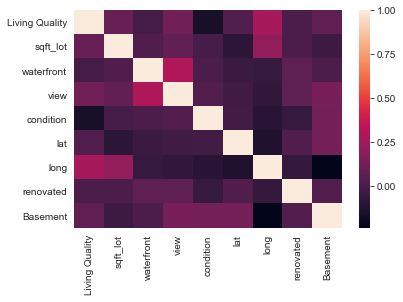

In [40]:
sns.heatmap(X_.corr())
display(X_.corr())

In [41]:
pearson_train = comp_lr.score(X_train, Y_train)
pearson_test = comp_lr.score(X_test, Y_test)

adj_train = AdjustedR(pearson_train, X_train.shape[0], X_train.shape[1])
adj_test = AdjustedR(pearson_train, X_test.shape[0], X_test.shape[1])
evaluation.iloc[4] = ['Complex Model (PCA feats)', mae, pearson_train, adj_train, pearson_test, adj_test]
evaluation

,Model,Mean Absolute Error (MAE),R^2 Train,Adjusted R^2 (Train),R^2 Test,Adjusted R^2 (Test)
0,Simple Linear Model,130346.683,0.388233,-,0.415429,-
1,Complex Model (basic feats),64613.100,0.825605,0.824719,0.824736,0.822007
2,Lasso,64616.036,0.825509,0.824623,0.82473,0.821909
3,Gradient Boosted Regressor,62261.743,0.84541,-,0.834045,-
4,Complex Model (PCA feats),74524.357,0.772838,0.77174,0.768916,0.768382
5,NaN,NaN,NaN,NaN,NaN,NaN


# Polynomial Model

In [42]:
from sklearn.preprocessing import PolynomialFeatures
X_train, X_test, Y_train, Y_test = train_test_split(X_dummy_pca, Y, test_size=.2, random_state=10)

In [43]:
polyfeats = PolynomialFeatures()
full_poly = polyfeats.fit_transform(X_dummy_pca)
train_poly = polyfeats.fit_transform(X_train)
test_poly = polyfeats.fit_transform(X_test)

poly = LinearRegression().fit(train_poly, Y_train)
pred_poly = poly.predict(test_poly)

print("20% sample test score: ", poly.score(test_poly, Y_test))
print("\nIntercept: ", poly.intercept_)
print("\nCoefficients: ", poly.coef_[:10])
mae = format(metrics.mean_absolute_error(Y_test, pred_poly), '.3f')
print("\nMean Squared Error: ", mae)


20% sample test score:  0.7288446974094853

Intercept:  -1204275889.2614908

Coefficients:  [-58782133.80057828   -538509.08492476   -101606.41591376
  44372188.104852   -27549671.23737782   2122604.75377794
  32600305.71057632  -7554150.26599279   1033036.4133423
  10939365.18246822]

Mean Squared Error:  71244.170


In [ ]:
pearson_train = poly.score(train_poly, Y_train)
pearson_test = poly.score(test_poly, Y_test)
evaluation.iloc[5] = ['Polynomial Regression', mae, pearson_train, '-', pearson_test, '-']
evaluation

,Model,Mean Absolute Error (MAE),R^2 Train,Adjusted R^2 (Train),R^2 Test,Adjusted R^2 (Test)
0,Simple Linear Model,130346.683,0.388233,-,0.415429,-
1,Complex Model (basic feats),64613.100,0.825605,0.824719,0.824736,0.822007
2,Lasso,64616.036,0.825509,0.824623,0.82473,0.821909
3,Gradient Boosted Regressor,62261.743,0.84541,-,0.834045,-
4,Complex Model (PCA feats),74524.357,0.772838,0.77174,0.768916,0.768382
5,Polynomial Regression,71244.170,0.807217,-,0.728845,-


In [ ]:
cross_val_score(poly, full_poly, Y, cv=10)

In [ ]:
full_poly = polyfeats.fit_transform(X_dummy_pca)
predicted = poly.predict(full_poly)
residual = Y - predicted
plt.figure(figsize=(10,5))
plt.scatter(predicted, residual)
plt.xlabel("Predicted")
plt.ylabel("Residual")
plt.title("Spread of Model Error (Polynomial)")
plt.show()
#Error distribution is not even, so a better model is needed

In [ ]:
plt.hist(residual)
plt.xlabel("Residual")
plt.show()

# Final evaluation of model choice

In [ ]:
evaluation.loc[np.argsort(evaluation['R^2 Train']), :]